### 1 Linear regression impact on outliers

In [1]:
# Creating data frame using given data
import pandas as pd

data = {
    "x": [0,1,2,3,4,5,6,7,8,9],
    "y": [20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03]
}
df = pd.DataFrame(data)

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X=df[["x"]]
y=df["y"]
model.fit(X,y)
print(f"Model coefficient : {model.coef_[0]}")
print(f"Model intercept   : {model.intercept_}")


Model coefficient : -3.557272727272728
Model intercept   : 3.916727272727277


In [3]:
import math

def truncate_float(num,n):
    num*=10**n
    return int(num)/10**n

m = model.coef_[0]
c = model.intercept_

print("="*40)
print(f"Model equation is y={truncate_float(m,2)}x + {truncate_float(c,2)}")
print("="*40)

df['y_pred']=model.predict(df[['x']])

Model equation is y=-3.55x + 3.91


### [1.3] Data points plot and linear regression plot

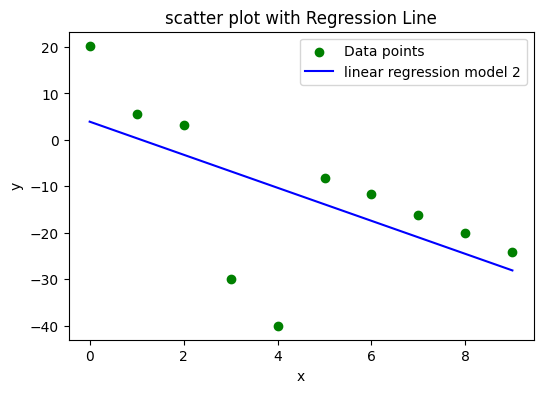

In [4]:
"""
    ====================================================
                scatter plot and Regression
    ====================================================
"""

plt.figure(figsize=(6,4))
plt.scatter(df["x"],df["y"],color='g',label="Data points")
plt.plot(df['x'],df['y_pred'],color='blue',label='linear regression model 2')
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot with Regression Line")
plt.legend()
plt.show()


In [5]:
df['y_pred_model1']=-4*df['x'] + 12

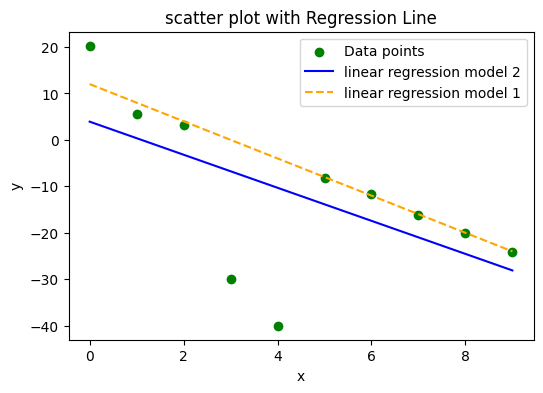

In [6]:
"""===========================================================
                    Plot the model 1 and model 2
   ===========================================================
"""
plt.figure(figsize=(6,4))
plt.scatter(df["x"],df["y"],color='g',label="Data points")
plt.plot(df['x'],df['y_pred'],color='blue',label='linear regression model 2')
plt.plot(df['x'],df['y_pred_model1'],color='orange',linestyle="--",label='linear regression model 1')
plt.xlabel("x")
plt.ylabel("y")
plt.title("scatter plot with Regression Line")
plt.legend()
plt.show()


In [7]:
print(df['x'].sum())

45


### [1.4] The loss function L(θ,β) values for all data samples using eq. (1) for β=1, β=10−6 and β=10^3

In [8]:
# define the robust function

def loss_funtion(df,df_y,df_ypred,beta,N):
    beeta_squared = beta**2
    p= (df_y-df_ypred)**2/((df_y-df_ypred)**2+beeta_squared)
    return (1/N)*(p.sum())

In [9]:
# Model 2
print(f"loss(Beta=1)      and Model 2): {loss_funtion(df,df['y'],df['y_pred'],1,10)}")
print(f"loss(Beta=10^(-6) and Model 2): {loss_funtion(df,df['y'],df['y_pred'],10**-6,10)}")
print(f"loss(Beta=10^(3)  and Model 2): {loss_funtion(df,df['y'],df['y_pred'],10**3,10)}")

loss(Beta=1)      and Model 2): 0.9732472128655365
loss(Beta=10^(-6) and Model 2): 0.9999999999999721
loss(Beta=10^(3)  and Model 2): 0.00018824604445913878


In [10]:
# Model 1
print(f"loss(Beta=1       and Model 1): {loss_funtion(df,df['y'],df['y_pred_model1'],1,10)}")
print(f"loss(Beta=10^(-6) and Model 1): {loss_funtion(df,df['y'],df['y_pred_model1'],10**-6,10)}")
print(f"loss(Beta=10^(3)  and Model 1): {loss_funtion(df,df['y'],df['y_pred_model1'],10**3,10)}")

loss(Beta=1       and Model 1): 0.435416262490386
loss(Beta=10^(-6) and Model 1): 0.9999999998258207
loss(Beta=10^(3)  and Model 1): 0.0002268287498440988


In [11]:
df

,x,y,y_pred,y_pred_model1
0,0,20.26,3.916727,12
1,1,5.61,0.359455,8
2,2,3.14,-3.197818,4
3,3,-30.00,-6.755091,0
4,4,-40.00,-10.312364,-4
5,5,-8.13,-13.869636,-8
6,6,-11.73,-17.426909,-12
7,7,-16.08,-20.984182,-16
8,8,-19.95,-24.541455,-20
9,9,-24.03,-28.098727,-24


In [12]:
import numpy as np
residuals = df["y"] - df["y_pred"]  # residuals for OLS
mad = (np.abs(residuals - np.median(residuals))).median()
beta_rec = 1.6 * mad if mad > 0 else 1.0
L1_rec = loss_funtion(df,df["y"], df["y_pred_model1"], beta_rec,10)
L2_rec = loss_funtion(df,df["y"], df["y_pred"], beta_rec,10)
print(f"\nMAD = {mad:.3f}  ->  beta≈1.6×MAD = {beta_rec:.3f}")
print(f"At beta≈{beta_rec:.3f}:  L(Model 1)={L1_rec:.6f}   L(Model 2)={L2_rec:.6f}")


MAD = 0.835  ->  beta≈1.6×MAD = 1.337
At beta≈1.337:  L(Model 1)=0.407962   L(Model 2)=0.953623


#### [1.5] Suitable β Value
#### Method 1
- The options are: β = 1, β = 10⁻⁶, β = 10³.
- Correct choice: β = 1
  - β = 10⁻⁶ - too small, treats even inliers as outliers.  
  - β = 10³  - too large, acts like least squares and gives outliers full weight.  
  - β = 1    - matches the scale of inlier residuals, suppresses outliers while keeping inliers.

Therefore, the suitable β is 1, because it balances sensitivity to inliers and robustness against large outliers.

#### Method 2 (MAD-based Selection)
- Residuals from model 2:  
  - Median residual ≈ 5.055  
  - MAD ≈ 0.85  
- This value is close to 1, confirming that β = 1 is the most suitable among the given options.
- Therefore by MAD method - β ≈ 1.36, which supports selecting β = 1 from the options.


#### [1.6] Model Selection Using Robust Estimator

With the selected β = 1 :

- Loss values:
  - L(Model 1) ≈ 0.435
  - L(Model 2) ≈ 0.973

- Interpretation:
  - Model 1 achieves a much lower robust loss than Model 2.  
  - The robust estimator down-weights the extreme outliers (e.g., at x = 3,4 with very large negative y values).  
  - Model 1 fits the main inlier trend of the data more closely, while Model 2 is overly influenced by the outliers and gives higher loss.

---

Final Answer:  
The most suitable model is Model 1 (y = -4x + 12), because under the robust loss with β = 1, it better captures the inlier pattern of the dataset and mitigates the influence of outliers compared to Model 2.


#### [1.7] How the Robust Estimator Reduces Outlier Impact
The Geman–McClure robust loss is defined as:

Loss = (Residual²) / (Residual² + β²)

- For small residuals (Residual much smaller than β), the loss behaves like a quadratic, so inlier points are fitted normally.  
- For large residuals (Residual much greater than β), the loss value saturates close to 1, meaning the contribution of outliers to the total cost is limited.  
- The influence of very large residuals approaches zero, so extreme outliers have almost no effect on the regression parameters.  

This robust estimator effectively down-weights large errors, preventing a few extreme outliers from dominating the regression fit, while still fitting the majority of inlier points accurately.


#### [1.8] Another Loss Function for Robust Estimation

One commonly used alternative is the **Huber loss function**, defined as:

$$
\rho(y_i, \hat{y}_i) =
\begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2 & \text{if } |y_i - \hat{y}_i| \leq \delta \\
\delta \, \big(|y_i - \hat{y}_i| - \tfrac{1}{2}\delta \big) & \text{if } |y_i - \hat{y}_i| > \delta
\end{cases}
$$

- For small errors $(|y_i - \hat{y}_i| \leq \delta)$, the loss is **quadratic**, giving full weight to inliers.  
- For large errors $(|y_i - \hat{y}_i| > \delta)$, the loss grows **linearly**, limiting the influence of outliers compared to squared loss.  
- This makes the Huber loss a balance between **least squares** (sensitive to inliers) and **absolute error** (robust to outliers).  


Another suitable loss function for the robust estimator is the **Huber loss**, as it combines quadratic behavior for inliers with linear growth for outliers, thereby reducing the impact of extreme values.


### 2 Loss Function

In [13]:
import pandas as pd
data1={
    "True y=1":[1]*13,
    "Prediction y_hat":[0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
}

table = pd.DataFrame(data1)

In [14]:
table['MSE']=(table['True y=1']-table['Prediction y_hat'])**2

In [15]:
import numpy as np
eps = 1e-15  # avoid log(0)
table['BCE'] = -( table['True y=1'] * np.log(table['Prediction y_hat'].clip(eps, 1-eps)) +
                 (1 - table['True y=1']) * np.log(1 - table['Prediction y_hat'].clip(eps, 1-eps)) )


In [16]:
table

,True y=1,Prediction y_hat,MSE,BCE
0,1,0.005,0.990025,5.298317e+00
1,1,0.010,0.980100,4.605170e+00
2,1,0.050,0.902500,2.995732e+00
3,1,0.100,0.810000,2.302585e+00
4,1,0.200,0.640000,1.609438e+00
5,1,0.300,0.490000,1.203973e+00
6,1,0.400,0.360000,9.162907e-01
7,1,0.500,0.250000,6.931472e-01
8,1,0.600,0.160000,5.108256e-01
9,1,0.700,0.090000,3.566749e-01


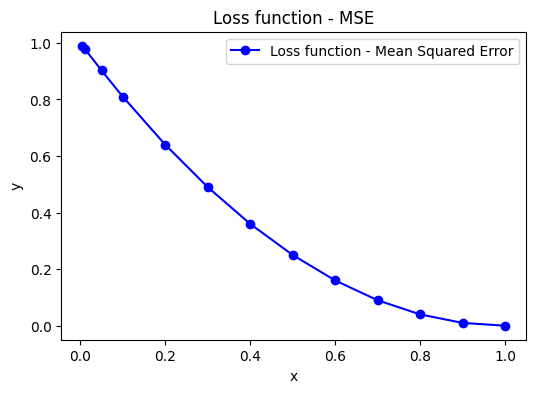

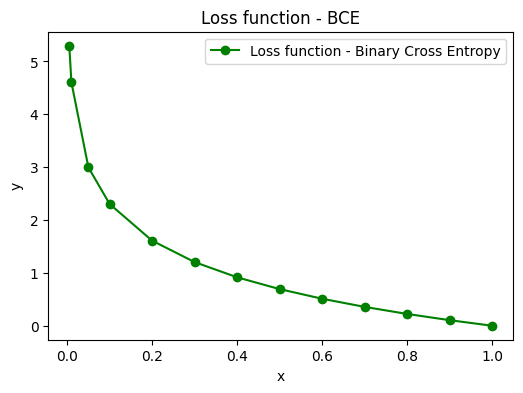

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(table['Prediction y_hat'],table['MSE'],color='blue',marker='o',label='Loss function - Mean Squared Error')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Loss function - MSE")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(table['Prediction y_hat'],table['BCE'],color='green',marker='o',label='Loss function - Binary Cross Entropy')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Loss function - BCE")
plt.legend()
plt.show()


#### Application 1 (Linear Regression, continuous target):
I would select Mean Squared Error (MSE) because the dependent variable is continuous.

MSE directly measures the squared distance between the predicted and actual values.

It is sensitive to how far predictions deviate numerically, which is exactly what we need for regression.

Using BCE here would be meaningless since BCE is designed for probabilities and categorical outputs.

#### Application 2 (Logistic Regression, binary target):
I would select Binary Cross-Entropy (BCE) because the dependent variable is binary (0 or 1).

BCE is the appropriate loss when predictions are probabilities in [0,1].

It strongly penalizes confident but wrong predictions (e.g., predicting 0.01 when the true label is 1).

This ensures the classifier produces calibrated probabilities that match the true distribution.

MSE is less suitable since it does not differentiate well between probability predictions and can give misleading gradients.

### 3 Data pre-processing

In [18]:
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero,replace=False)
    nonzero_values = 10*np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

10.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_24736\1617074790.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sparse_signal[10] = np.random.randn(1) + 30


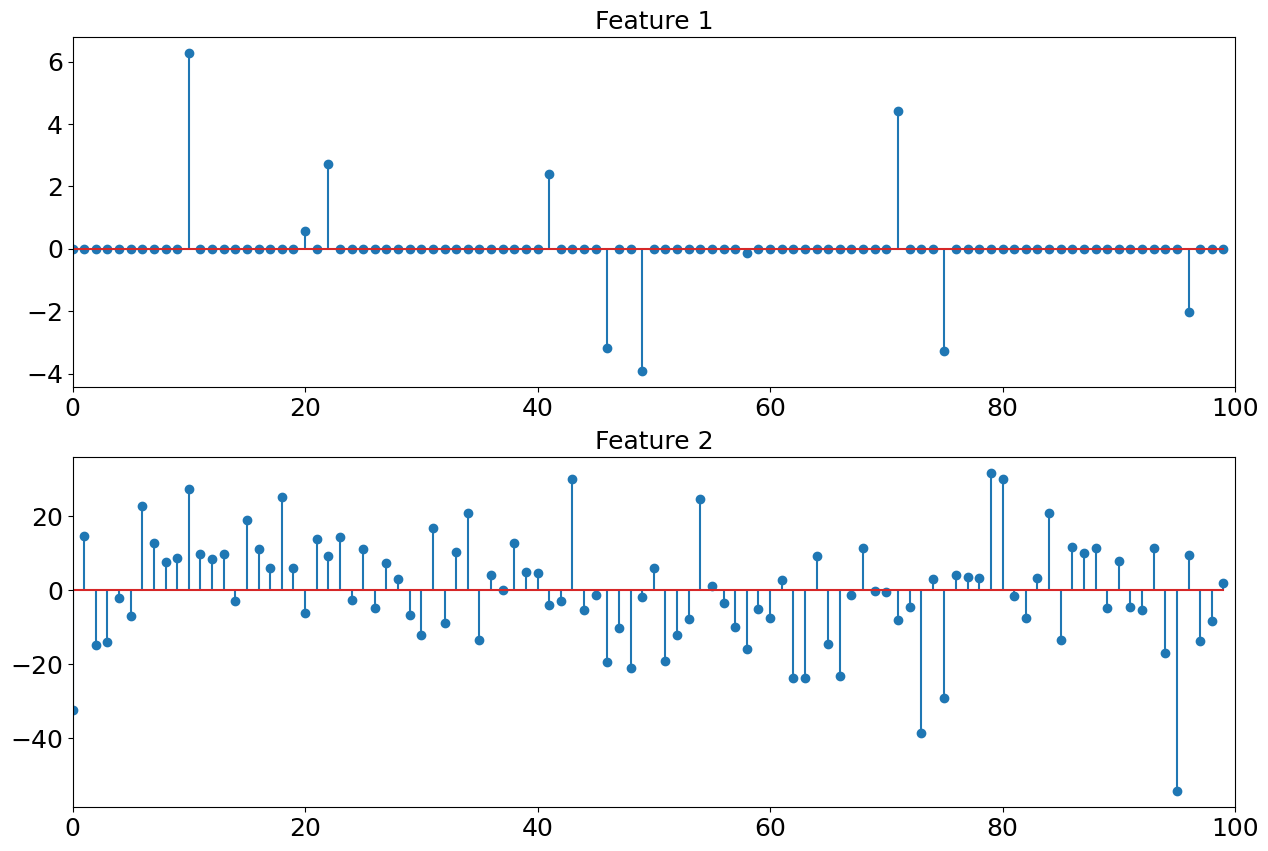

In [19]:
signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the singal
your_index_no= 220310
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10
print(sparse_signal[10])
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )
epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

#### a) Standard scaling

In [20]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Assume sparse_signal and epsilon already exist

# Reshape for StandardScaler
sparse_signal = sparse_signal.reshape(-1,1)
epsilon = epsilon.reshape(-1,1)

# Scale with StandardScaler
scaled_sparse_signal = preprocessing.StandardScaler().fit_transform(sparse_signal).flatten()
scaled_epsilon = preprocessing.StandardScaler().fit_transform(epsilon).flatten()

# Flatten originals for plotting
sparse_signal = sparse_signal.flatten()
epsilon = epsilon.flatten()




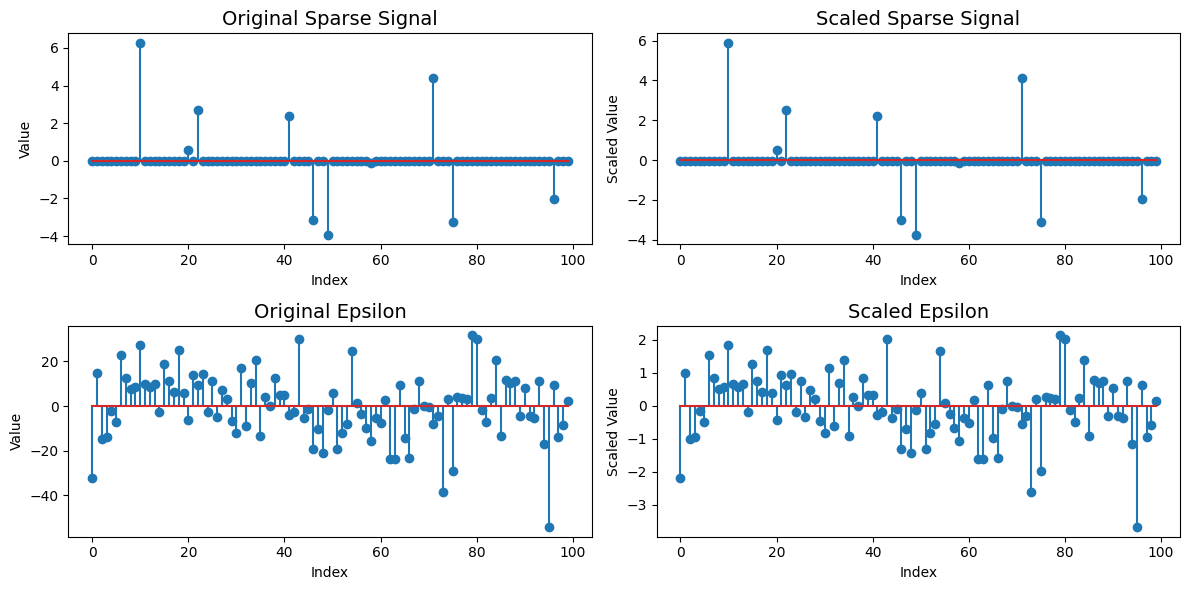

In [21]:
# Plot Original vs Scaled for sparse_signal
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
plt.title("Original Sparse Signal", fontsize=14)
plt.stem(sparse_signal)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 2)
plt.title("Scaled Sparse Signal", fontsize=14)
plt.stem(scaled_sparse_signal)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

# Plot Original vs Scaled for epsilon
plt.subplot(2, 2, 3)
plt.title("Original Epsilon", fontsize=14)
plt.stem(epsilon)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 4)
plt.title("Scaled Epsilon", fontsize=14)
plt.stem(scaled_epsilon)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()

#### b) MinMaxScaler

In [22]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Assume sparse_signal and epsilon already exist

# Reshape for MinMax
sparse_signal = sparse_signal.reshape(-1,1)
epsilon = epsilon.reshape(-1,1)

# Scale with StandardScaler
scaled_sparse_signal = preprocessing.MinMaxScaler().fit_transform(sparse_signal).flatten()
scaled_epsilon = preprocessing.MinMaxScaler().fit_transform(epsilon).flatten()

# Flatten originals for plotting
sparse_signal = sparse_signal.flatten()
epsilon = epsilon.flatten()



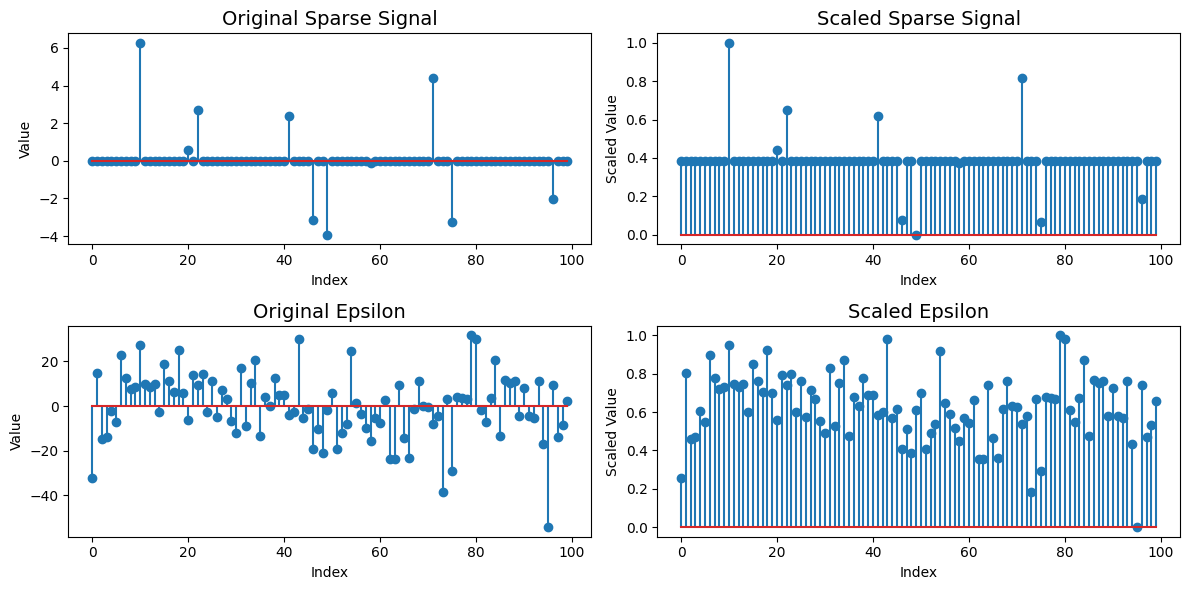

In [23]:
# Plot Original vs Scaled for sparse_signal
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
plt.title("Original Sparse Signal", fontsize=14)
plt.stem(sparse_signal)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 2)
plt.title("Scaled Sparse Signal", fontsize=14)
plt.stem(scaled_sparse_signal)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

# Plot Original vs Scaled for epsilon
plt.subplot(2, 2, 3)
plt.title("Original Epsilon", fontsize=14)
plt.stem(epsilon)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 4)
plt.title("Scaled Epsilon", fontsize=14)
plt.stem(scaled_epsilon)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()


#### c) MaxAbsScaler

In [24]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Assume sparse_signal and epsilon already exist

# Reshape for MinMax
sparse_signal = sparse_signal.reshape(-1,1)
epsilon = epsilon.reshape(-1,1)

# Scale with StandardScaler
scaled_sparse_signal = preprocessing.MaxAbsScaler().fit_transform(sparse_signal).flatten()
scaled_epsilon = preprocessing.MaxAbsScaler().fit_transform(epsilon).flatten()

# Flatten originals for plotting
sparse_signal = sparse_signal.flatten()
epsilon = epsilon.flatten()


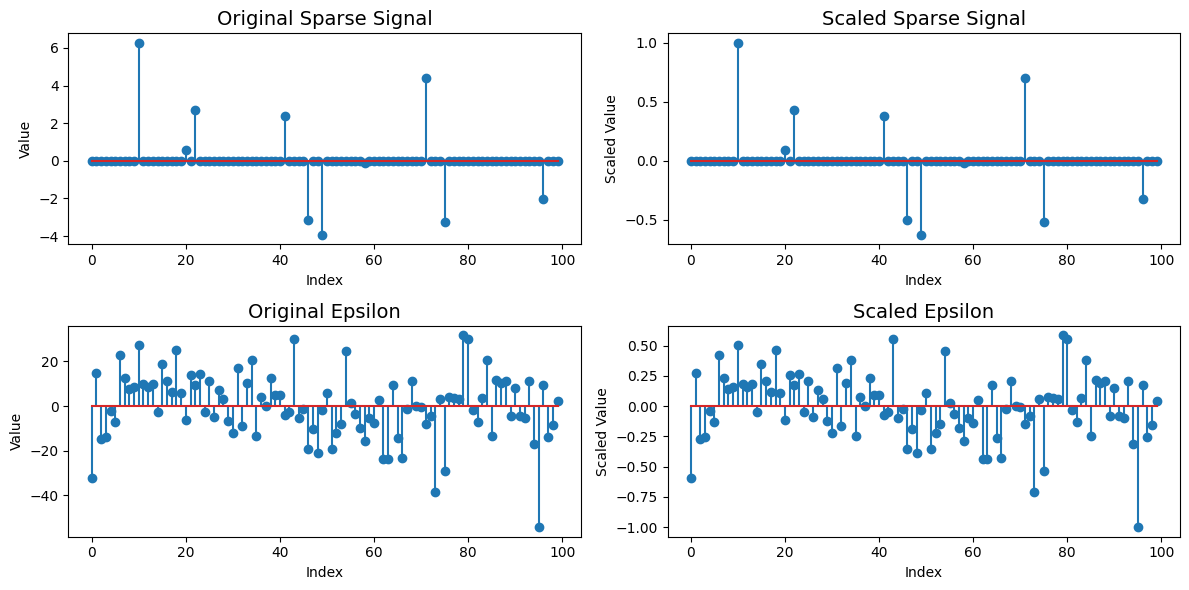

In [25]:
# Plot Original vs Scaled for sparse_signal
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
plt.title("Original Sparse Signal", fontsize=14)
plt.stem(sparse_signal)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 2)
plt.title("Scaled Sparse Signal", fontsize=14)
plt.stem(scaled_sparse_signal)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

# Plot Original vs Scaled for epsilon
plt.subplot(2, 2, 3)
plt.title("Original Epsilon", fontsize=14)
plt.stem(epsilon)
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 4)
plt.title("Scaled Epsilon", fontsize=14)
plt.stem(scaled_epsilon)
plt.xlabel("Index")
plt.ylabel("Scaled Value")

plt.tight_layout()
plt.show()


#### Scaling Method Selection

For **Feature 1 (sparse_signal)** I would choose **Max–abs scaling**. This is because the feature is mostly made up of zeros with only a few non-zero values, and max–abs scaling keeps all the zeros unchanged while still scaling the non-zero values into the range [−1, 1]. This helps to preserve the sparsity structure of the feature.

For **Feature 2 (epsilon)** I would choose **Standard scaling**. Since this feature is generated from a Gaussian distribution with mean 0 and variance 15², standardization is the most suitable method. It will transform the feature to have mean 0 and variance 1, which preserves the normal distribution shape but makes it easier to compare with other features on the same scale.

**Final Answer:**  
- Feature 1 → Max–abs scaling (to preserve sparsity)  
- Feature 2 → Standard scaling (to preserve Gaussian structure)  
